If you want to type along with me, head to [this notebook](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fbethanyj0%2Fdata111_fa24&branch=main&urlpath=lab%2Ftree%2Fdata111_fa24%2Flectures%2Flec07_live.ipynb) instead. If you prefer follow along by executing the cells, stay in this notebook.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7 ##

## Census ##

In [ ]:
full = Table.read_table('nc-est2019-agesex-res.csv')

In [ ]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2019')

In [ ]:
# Make things easier to read
us_pop_2019 = partial.relabeled(2, '2019')
us_pop_2019

In [ ]:
us_pop_2019.where('AGE', are.equal_to(999))

In [ ]:
us_pop_2019.where('AGE', are.equal_to(0))

In [ ]:
us_pop_2019.where('AGE', are.equal_to(100))

## Line Plots and Males vs Females

In [ ]:
# Remove the age totals
no_999 = us_pop_2019.where('AGE', are.below(999))

In [ ]:
overall = no_999.where('SEX', 0).drop('SEX')
overall

In [ ]:
## Our first line plot! 
overall.plot('AGE', '2019')

**Options for labeling**

In [ ]:
### OPTION 1
# US Population  <--- Just add a comment
overall.plot('AGE', '2019')

In [ ]:
### OPTION 2
overall.plot('AGE', '2019')
print('US Population')  # <--- Print out what it is

In [ ]:
### OPTION 3
overall.plot('AGE', '2019')
plots.title('US Population');    # <--- not needed for Data 111, but a handy skill!

## Let's use line plots as part of an analysis

**Activity:** Create two new tables: `males` and `females`. 
* The table called `males` should contain two columns `AGE` and `2019`, for the population size of US males in 2019 by age from 0 to 100 (inclusive). 
* The table called `females` should contain two columns `AGE` and `2019`, for the population size of US females in 2019 by age from 0 to 100 (inclusive).

In [ ]:
males = 
males

In [ ]:
females = 
females

In [ ]:
males_females_2019 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2019'),
    'Females', females.column('2019')
)
males_females_2019

In [ ]:
males_females_2019.plot('Age')

In [ ]:
# Calculate the percent female for each age
total = males_females_2019.column('Males') + males_females_2019.column('Females')
proportion_female = males_females_2019.column('Females') / total 
proportion_female

In [ ]:
# Add female percent to our table
males_females_2019 = males_females_2019.with_column('Proportion female', proportion_female).set_format('Proportion female',PercentFormatter)
males_females_2019

In [ ]:
males_females_2019.plot('Age', 'Proportion female')

In [ ]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think

males_females_2019.plot('Age', 'Proportion female')
plots.ylim(0, 1);  # Optional for Data 111

In [ ]:
males_females_2019.take(np.arange(35,45))

## Scatter Plots ##

In [ ]:
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

In [ ]:
actors.scatter('Number of Movies', 'Total Gross')

In [ ]:
actors.scatter('Number of Movies', 'Average per Movie')

In [ ]:
actors.where('Average per Movie', are.above(400))

## Bar Charts ##

In [2]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [ ]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

In [ ]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

In [ ]:
top10_adjusted.barh('Title', 'Millions')

In [6]:
top10_adjusted = top10_adjusted.with_column('Age of Movie', 2024 - top10_adjusted.column('Year'))

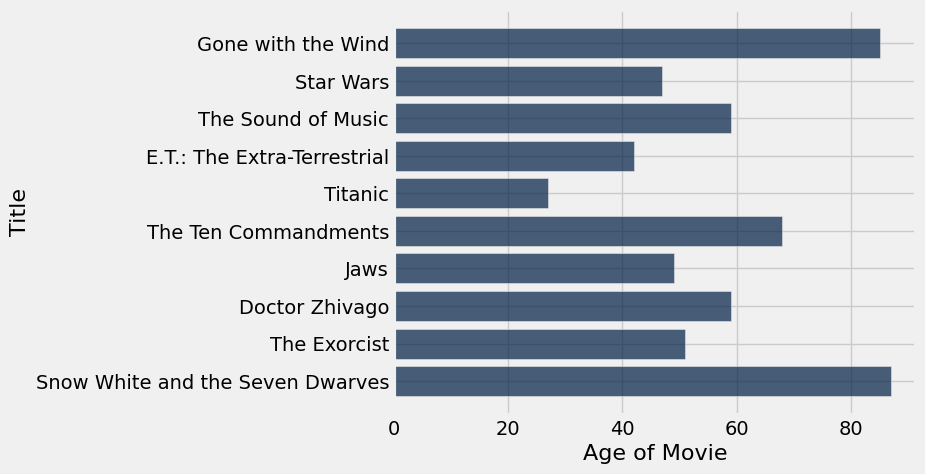

In [7]:
top10_adjusted.barh('Title','Age of Movie')